In [10]:
from pathlib import Path
import soundfile as sf
import numpy as np
import matplotlib.pyplot as plt
import librosa.display

old_data_basepath = Path("/share/hel/scratch/jazzbeat_transformer/mono_tracks")
new_data_basepath = Path("/share/hel/home/francesco/beat_this/data/preprocessed/mono_tracks")

In [9]:
# count the number of folders in the old dataset
old_folder_count = sum(1 for _ in old_data_basepath.rglob("*") if not _.is_file())
print(f"Old dataset folder count: {old_folder_count}")
# count the number of folders in the new dataset
new_folder_count = sum(1 for _ in new_data_basepath.rglob("*") if not _.is_file())
print(f"New dataset folder count: {new_folder_count}")

# find the folders which are in the old dataset but not in the new dataset
old_folders = set(_.relative_to(old_data_basepath) for _ in old_data_basepath.rglob("*") if not _.is_file())
new_folders = set(_.relative_to(new_data_basepath) for _ in new_data_basepath.rglob("*") if not _.is_file())
missing_folders = old_folders - new_folders
print(f"Missing folders: {missing_folders}")

Old dataset folder count: 5585
New dataset folder count: 5529
Missing folders: {PosixPath('guitarset/00_Rock1-130-A_solo_mix'), PosixPath('guitarset/03_SS2-88-F_solo_mix'), PosixPath('guitarset/03_Funk2-108-Eb_solo_mix'), PosixPath('guitarset/04_Rock1-90-C#_solo_mix'), PosixPath('guitarset/01_SS2-107-Ab_solo_mix'), PosixPath('guitarset/00_BN2-166-Ab_solo_mix'), PosixPath('guitarset/03_Funk2-119-G_solo_mix'), PosixPath('guitarset/04_SS1-100-C#_solo_mix'), PosixPath('guitarset/04_BN2-131-B_solo_mix'), PosixPath('guitarset/02_SS3-98-C_solo_mix'), PosixPath('guitarset/00_Rock2-85-F_solo_mix'), PosixPath('guitarset/02_Jazz2-110-Bb_solo_mix'), PosixPath('guitarset/05_Funk2-108-Eb_solo_mix'), PosixPath('guitarset/05_SS2-107-Ab_solo_mix'), PosixPath('guitarset/02_Rock3-148-C_solo_mix'), PosixPath('guitarset/03_SS3-84-Bb_solo_mix'), PosixPath('guitarset/00_SS1-68-E_solo_mix'), PosixPath('guitarset/01_Jazz3-137-Eb_solo_mix'), PosixPath('guitarset/01_Rock3-148-C_solo_mix'), PosixPath('guitarset/0

In [55]:
piece_path = "ballroom/ballroom_Albums-Ballroom_Classics4-03/track_ps-5.wav"
old_piece_path = old_data_basepath / piece_path
new_piece_path = new_data_basepath / piece_path

old_audio, old_sr = sf.read(old_piece_path)
new_audio, new_sr = sf.read(new_piece_path)

print(f"Old audio shape: {old_audio.shape}, sample rate: {old_sr}")
print(f"New audio shape: {new_audio.shape}, sample rate: {new_sr}")

# check if the audio is the same
print(np.allclose(old_audio, new_audio))


Old audio shape: (700924,), sample rate: 22050
New audio shape: (700924,), sample rate: 22050
False


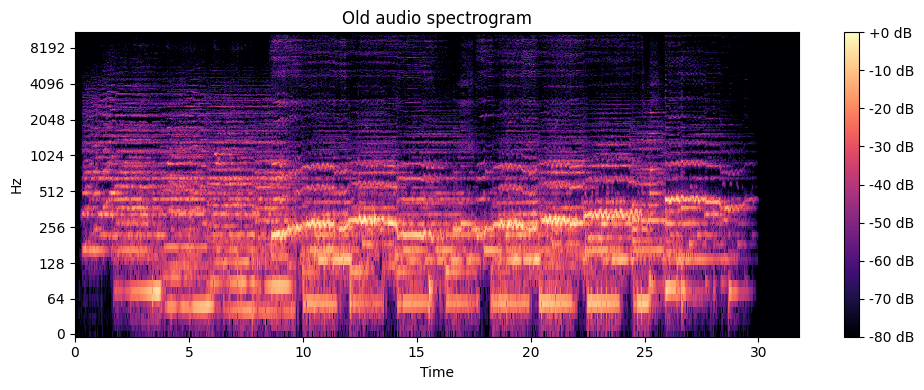

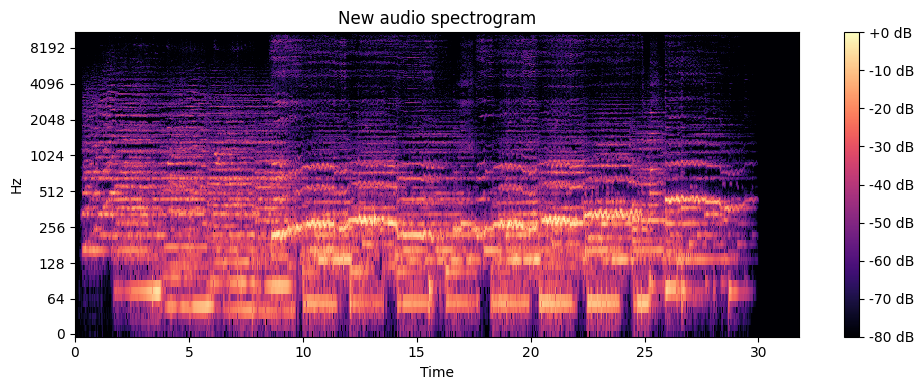

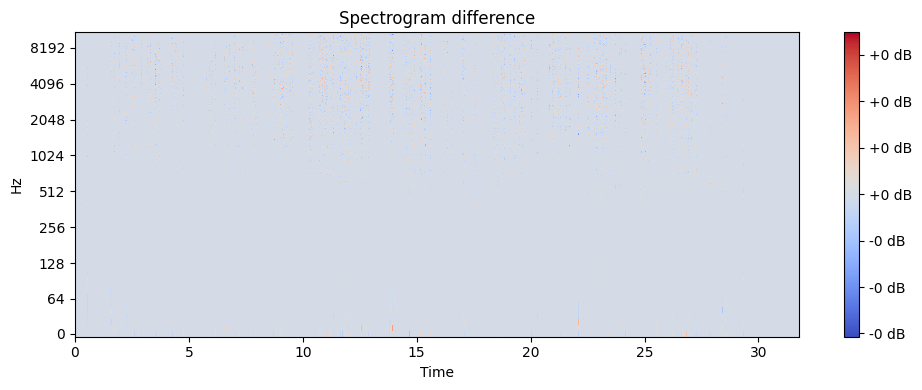

In [56]:
# Compute the spectrogram for each audio file
old_spectrogram = librosa.amplitude_to_db(np.abs(librosa.stft(old_audio)), ref=np.max)
new_spectrogram = librosa.amplitude_to_db(np.abs(librosa.stft(new_audio)), ref=np.max)

# Display the spectrogram for the old audio file
plt.figure(figsize=(10, 4))
librosa.display.specshow(old_spectrogram, y_axis='log', x_axis='time')
plt.title('Old audio spectrogram')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()
plt.show()

# Display the spectrogram for the new audio file
plt.figure(figsize=(10, 4))
librosa.display.specshow(new_spectrogram, y_axis='log', x_axis='time')
plt.title('New audio spectrogram')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()
plt.show()

# Compute the difference
diff = old_spectrogram - new_spectrogram

# Plot the difference
plt.figure(figsize=(10, 4))
librosa.display.specshow(diff, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram difference')
plt.tight_layout()
plt.show()

In [52]:
# listen to the audio on the notebook
import IPython.display as ipd
ipd.Audio(old_audio, rate=old_sr)
# save the audio to a file
sf.write("old_audio.wav", old_audio, old_sr)



In [53]:
ipd.Audio(new_audio, rate=old_sr)
sf.write("new_audio.wav", new_audio, old_sr)

In [1]:
from pathlib import Path
import pandas as pd

# Check the number of training examples in single split and 8fold

In [6]:
DATASET_INFO = {
    "hainsworth" : {"beat": True, "downbeat" : True},
    "ballroom" : {"beat": True, "downbeat" : True},
    "hjdb" : {"beat": True, "downbeat" : True},
    "beatles" : {"beat": True, "downbeat" : True},
    "rwc" : {"beat": True, "downbeat" : True},
    "harmonix" : {"beat": True, "downbeat": True},
    "tapcorrect" : {"beat": True, "downbeat": True},
    "jaah" : {"beat": True, "downbeat": True},
    "filosax" : {"beat": True, "downbeat": True},
    "asap" : {"beat": True, "downbeat": True},
    "groove_midi" : {"beat": True, "downbeat": True},
    "guitarset" : {"beat": True, "downbeat": True},
    "candombe" : {"beat": True, "downbeat": True},
    "simac" : {"beat": True, "downbeat" : False},
    "smc" : {"beat": True, "downbeat" : False},
}

In [21]:
# load the single splits
split_dfs = {}
for dataset in DATASET_INFO.keys():
    split_path = Path(f"/share/hel/home/francesco/beat_this/data/beat_annotations/{dataset}/split.csv")
    split_df = pd.read_csv(split_path)
    split_dfs[dataset] = split_df

# check the ratio of train and validation pieces
train_number = 0
val_number = 0
for dataset, split_df in split_dfs.items():
    train_number += split_df["split"].eq("train").sum()
    val_number += split_df["split"].eq("val").sum()

print(f"Train pieces: {train_number}, validation pieces: {val_number}")
print("Ratio: ", val_number / train_number)

Train pieces: 4001, validation pieces: 556
Ratio:  0.13896525868532866


In [22]:
# print the percentage of each dataset in the validation set
for dataset, split_df in split_dfs.items():
    val_percentage = split_df["split"].eq("val").sum() / len(split_df)
    print(f"{dataset}: {val_percentage:.2%}")

hainsworth: 14.86%
ballroom: 15.04%
hjdb: 14.89%
beatles: 15.00%
rwc: 15.04%
harmonix: 15.04%
tapcorrect: 14.85%
jaah: 15.04%
filosax: 14.58%
asap: 13.74%
groove_midi: 15.18%
guitarset: 15.00%
candombe: 14.29%
simac: 0.00%
smc: 0.00%


In [16]:
# load 8folds splits
split_dfs = {}
for dataset in DATASET_INFO.keys():
    split_path = Path(f"/share/hel/home/francesco/beat_this/data/beat_annotations/{dataset}/{dataset}_8-fold.folds")
    split_df = pd.read_csv(split_path, sep="\t", names=["piece","split"])
    split_dfs[dataset] = split_df

# check the ratio of train and validation pieces for every fold
train_fold= {}
val_fold = {}
for fold in range(8):
    train_number = 0
    val_number = 0
    for dataset, split_df in split_dfs.items():
        train_number += split_df[split_df["split"]!=fold].shape[0]
        val_number += split_df[split_df["split"]==fold].shape[0]
    print("Fold", fold)
    print(f"Train pieces: {train_number}, validation pieces: {val_number}")
    print("Ratio: ", val_number / train_number)
    train_fold[fold] = train_number
    val_fold[fold] = val_number



Fold 0
Train pieces: 3986, validation pieces: 571
Ratio:  0.14325137982940292
Fold 1
Train pieces: 3987, validation pieces: 570
Ratio:  0.14296463506395787
Fold 2
Train pieces: 3995, validation pieces: 562
Ratio:  0.1406758448060075
Fold 3
Train pieces: 3989, validation pieces: 568
Ratio:  0.14239157683629983
Fold 4
Train pieces: 3988, validation pieces: 569
Ratio:  0.14267803410230692
Fold 5
Train pieces: 3984, validation pieces: 573
Ratio:  0.1438253012048193
Fold 6
Train pieces: 3982, validation pieces: 575
Ratio:  0.1443997990959317
Fold 7
Train pieces: 3988, validation pieces: 569
Ratio:  0.14267803410230692


In [17]:
sum(train_fold.values()), sum(val_fold.values())

(31899, 4557)

In [18]:
sum([df.shape[0] for df in split_dfs.values()])

4557

In [20]:
4557/8

569.625